In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\UberDataset (1).csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
df.shape

(1156, 7)

In [12]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce', dayfirst=True)
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce', dayfirst=True)
print(df['START_DATE'].isna().sum())  # count of failed parses
print(df.shape)

735
(1156, 7)


In [13]:
df['PURPOSE'].fillna('NOT SPECIFIED', inplace=True)

In [14]:
import unicodedata

# Clean both START and END columns
def clean_text(text):
    if isinstance(text, str):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
    return text

df['START'] = df['START'].apply(clean_text)
df['STOP'] = df['STOP'].apply(clean_text)


In [17]:
df.shape

(421, 7)

In [16]:
df = df[df['START_DATE'].notnull()]

In [8]:
print(df['START_DATE'].isna().sum()) 

0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 1047
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    421 non-null    object        
 3   START       421 non-null    object        
 4   STOP        421 non-null    object        
 5   MILES       421 non-null    float64       
 6   PURPOSE     421 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 26.3+ KB


In [19]:
df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

In [20]:
df['day-night'] = pd.cut(x=df['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [21]:
df.dropna(inplace=True)

In [22]:
df.shape

(413, 10)

In [23]:
df.drop_duplicates(inplace=True)

In [45]:
df.shape

(413, 10)

In [24]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = df[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

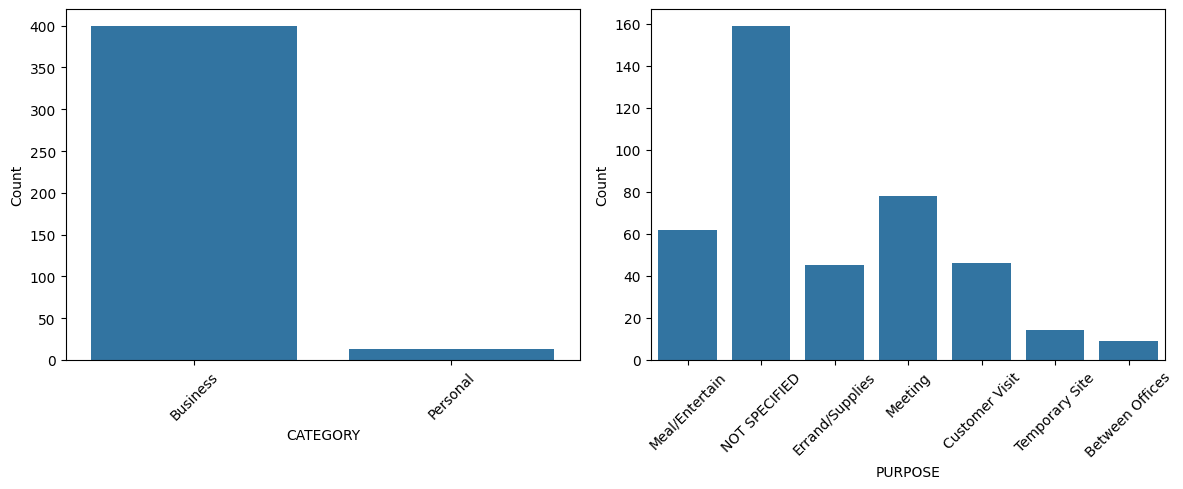

In [25]:
# Set figure size
plt.figure(figsize=(12, 5))

# First subplot for CATEGORY
plt.subplot(1, 2, 1)
sns.countplot(x=df['CATEGORY'])  # Change 'y' to 'x' for vertical bars
plt.xlabel("CATEGORY")  # Label for x-axis
plt.ylabel("Count")  # Label for y-axis
plt.xticks(rotation=45)  # Rotate labels for better readability

# Second subplot for PURPOSE
plt.subplot(1, 2, 2)
sns.countplot(x=df['PURPOSE'])  # Change 'y' to 'x' for vertical bars
plt.xlabel("PURPOSE")  # Label for x-axis
plt.ylabel("Count")  # Label for y-axis
plt.xticks(rotation=45)  # Rotate labels for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

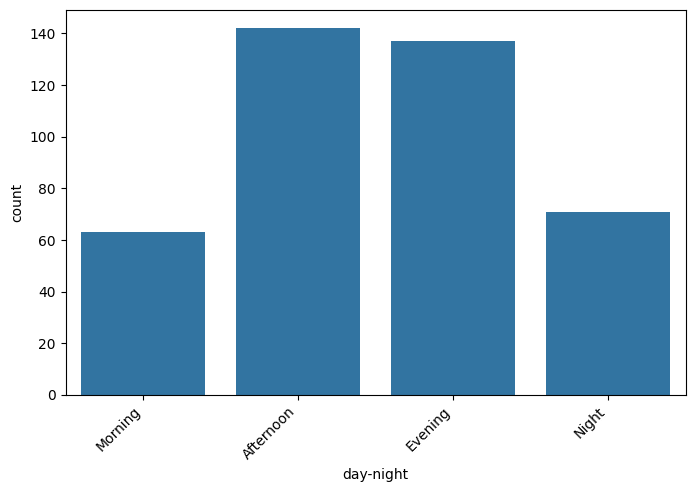

In [26]:
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
sns.countplot(x=df['day-night'])  # Ensure 'x' is used instead of 'y'
plt.xticks(rotation=45, ha='right')  # Force label rotation and align to the right
plt.show()

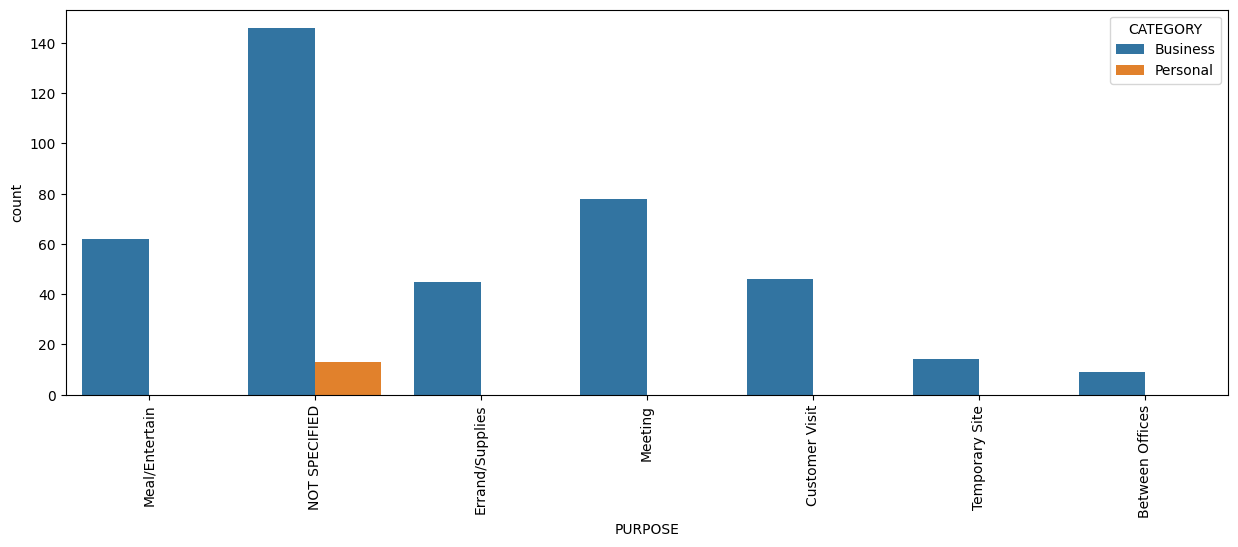

In [27]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(object_cols, axis=1)
df = pd.concat([df_final, OH_cols], axis=1)

In [30]:
df_final

,START_DATE,END_DATE,START,STOP,MILES,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21,Night
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Fort Pierce,Fort Pierce,5.0,2016-02-01,1,Morning
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-02-01,20,Night
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Fort Pierce,Fort Pierce,4.7,2016-05-01,17,Evening
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Fort Pierce,West Palm Beach,63.7,2016-06-01,14,Afternoon
...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Cary,Cary,3.1,2016-12-12,13,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Cary,Apex,4.4,2016-12-12,13,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Apex,Cary,4.7,2016-12-12,14,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Cary,Morrisville,3.0,2016-12-12,17,Evening


<Axes: >

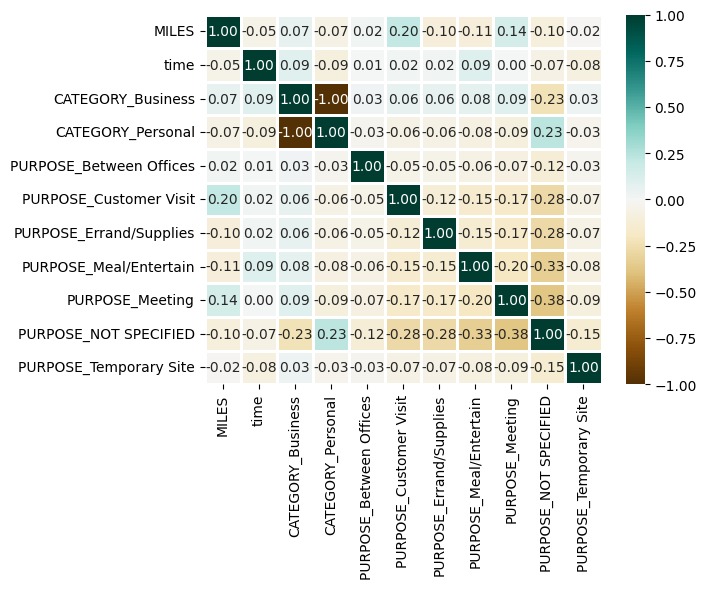

In [32]:
numeric_dataset = df.select_dtypes(include=['number'])
sns.heatmap(numeric_dataset.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

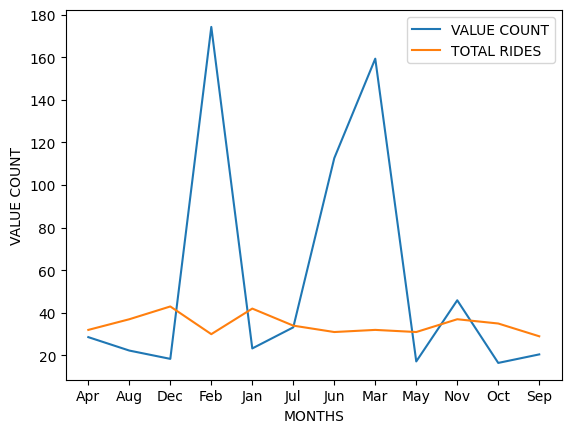

In [34]:
# Map month numbers to names
month_label = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr",
    5: "May", 6: "Jun", 7: "Jul", 8: "Aug",
    9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

df["MONTH"] = pd.DatetimeIndex(df["START_DATE"]).month
df["MONTH"] = df["MONTH"].map(month_label)

# Ensure both counts and max are sorted in the same order
mon = df["MONTH"].value_counts().sort_index()

df2 = pd.DataFrame({
    "MONTHS": mon.index,
    "VALUE COUNT": df.groupby("MONTH")["MILES"].max().reindex(mon.index)
})

sns.lineplot(x=df2["MONTHS"], y=df2["VALUE COUNT"], label="VALUE COUNT")
sns.lineplot(x=df2["MONTHS"], y=mon.values, label="TOTAL RIDES")

plt.xlabel("MONTHS")
plt.ylabel("VALUE COUNT")
plt.legend()
plt.show()


In [35]:
df2

,MONTHS,VALUE COUNT
MONTH,,
Apr,Apr,28.6
Aug,Aug,22.3
Dec,Dec,18.4
Feb,Feb,174.2
Jan,Jan,23.3
Jul,Jul,33.2
Jun,Jun,112.6
Mar,Mar,159.3
May,May,17.2


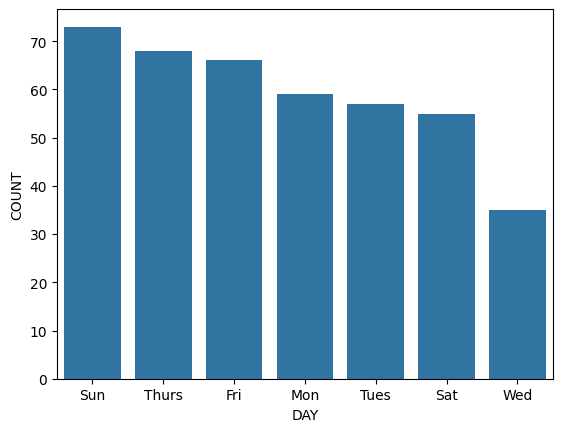

In [36]:
df['DAY'] = df['START_DATE'].dt.weekday

day_mapping = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['DAY'] = df['DAY'].map(day_mapping)  # Correct mapping

# Compute day counts
day_counts = df['DAY'].value_counts()

# Fix: Ensure barplot gets correct x and y values
sns.barplot(x=day_counts.index, y=day_counts.values)

plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.show()

<Axes: ylabel='MILES'>

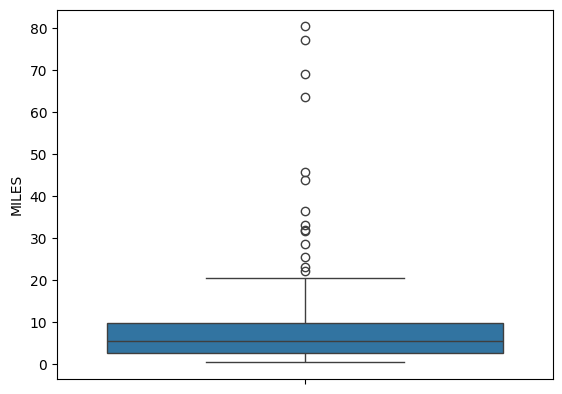

In [37]:
sns.boxplot(df[df['MILES'] < 100]['MILES'])

<Axes: xlabel='MILES', ylabel='Count'>

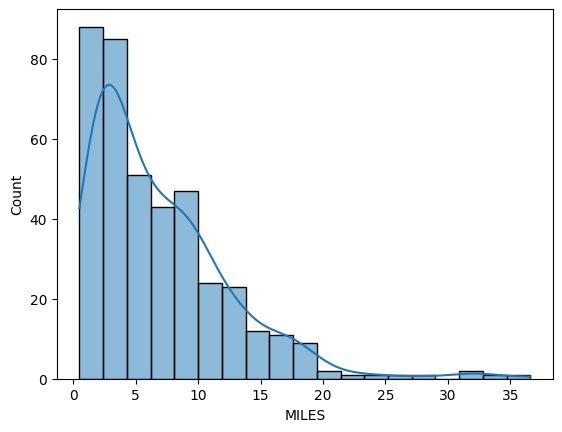

In [38]:
sns.histplot(df[df['MILES']<40]['MILES'], kde=True)